In [16]:
# from mplfinance.original_flavor import candlestick_ohlc # pip install --upgrade mplfinance
# import yfinance as yf  # pip install yfinance
# import matplotlib.dates as mdates
# import matplotlib.pyplot as plt
# import requests
# from datetime import datetime
# import pandas as pd
# import warnings
# import numpy as np
# import seaborn as sns


# from dateutil.relativedelta import relativedelta # working with dates with style
# from scipy.optimize import minimize              # for function minimization
# import statsmodels.formula.api as smf            # statistics and econometrics
# import statsmodels.tsa.api as smt
# import statsmodels.api as sm
# import scipy.stats as scs
# from itertools import product
# from tqdm import tqdm_notebook

# sns.set()
# %matplotlib inline
# warnings.filterwarnings("ignore")



# # Import libraries
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# from scipy import stats
# import statsmodels.api as sm
# import warnings
# from itertools import product
# from datetime import datetime
# warnings.filterwarnings('ignore')
# plt.style.use('seaborn-poster')



In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from mplfinance.original_flavor import candlestick_ohlc 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [18]:
def get_price_data(ticker='AMZN'):
    tickerData = yf.Ticker(ticker)
    tickerDf = tickerData.history(period='1d', start='2017-1-1', end='2022-10-20')
    return tickerDf.iloc[:, :5]

In [19]:
def plot_candlestick(df, ax=None, fmt="%Y-%m-%d"):
    if ax is None:
        fig, ax = plt.subplots()
    idx_name = df.index.name if df.index.name else 'index'
    dat = df.reset_index()[[idx_name, "Open", "High", "Low", "Close"]]
    dat[idx_name] = dat[idx_name].map(mdates.date2num)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt))
    plt.xticks(rotation=45)
    _ = candlestick_ohlc(ax, dat.values, width=.6, colorup='g', alpha =1)
    ax.set_xlabel(idx_name)
    ax.set_ylabel("OHLC")
    return ax

In [20]:
# get price data (return pandas dataframe)
df = get_price_data()

In [21]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,70422000
2017-01-04,37.919498,37.984001,37.709999,37.859001,50210000
2017-01-05,38.077499,39.119999,38.013000,39.022499,116602000
2017-01-06,39.118000,39.972000,38.924000,39.799500,119724000
2017-01-09,39.900002,40.088501,39.588501,39.846001,68922000


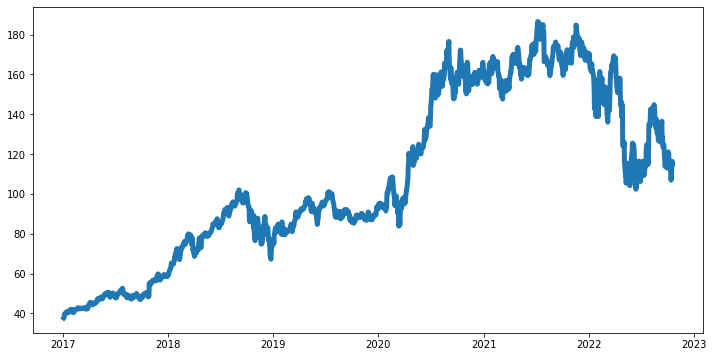

In [22]:

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], linewidth=5.0)
plt.show()

NameError: name 'mdates' is not defined

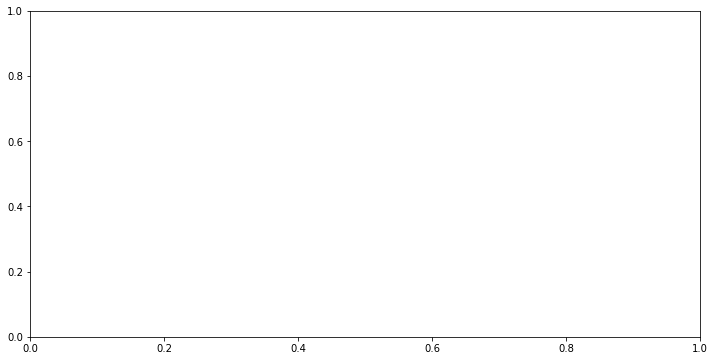

In [23]:
fig = plt.figure(figsize=(12,6))
plot_candlestick(df, fig.subplots())
plt.show()

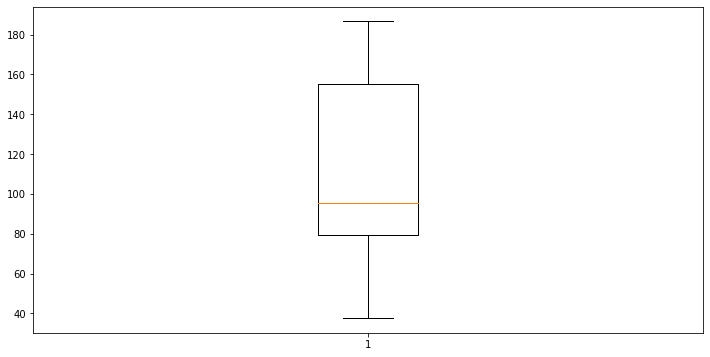

In [24]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['Close'])
plt.show()

In [25]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [26]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [27]:
series = df['Close']

Results of Dickey-Fuller Test:
Test Statistic                   -1.727268
p-value                           0.417121
#Lags Used                        0.000000
Number of Observations Used    1459.000000
Critical Value (1%)              -3.434840
Critical Value (5%)              -2.863523
Critical Value (10%)             -2.567826
dtype: float64


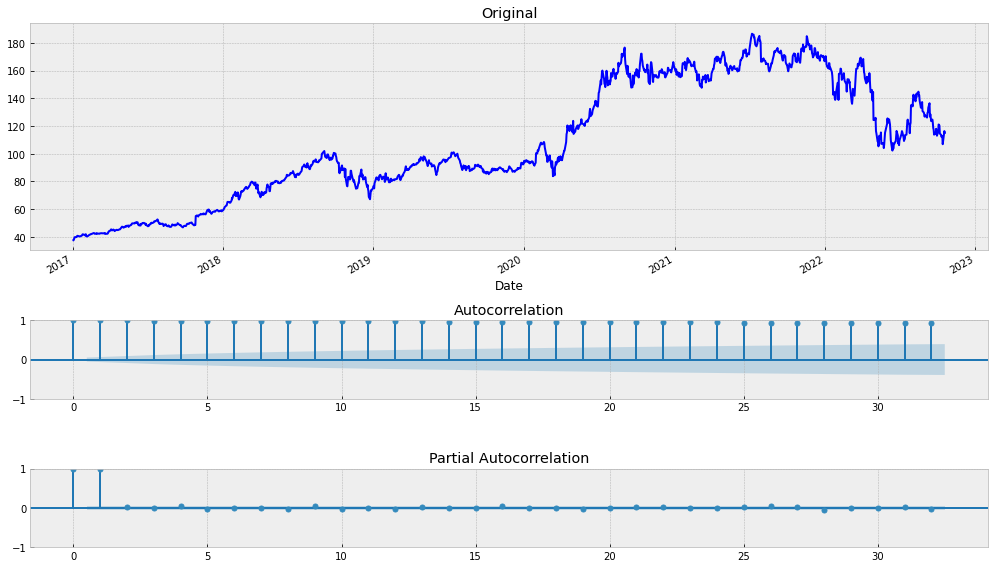

In [28]:
tsplot(series)

In [29]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                   -2.124749
p-value                           0.234680
#Lags Used                        8.000000
Number of Observations Used    1451.000000
Critical Value (1%)              -3.434865
Critical Value (5%)              -2.863534
Critical Value (10%)             -2.567832
dtype: float64


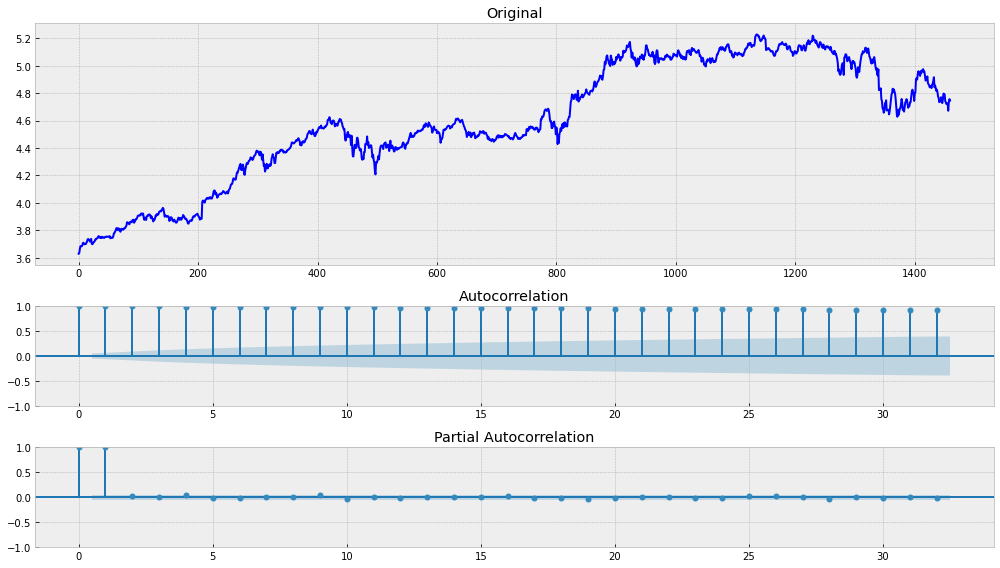

In [30]:
tsplot(series)

In [31]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.456762e+01
p-value                        4.684095e-27
#Lags Used                     7.000000e+00
Number of Observations Used    1.451000e+03
Critical Value (1%)           -3.434865e+00
Critical Value (5%)           -2.863534e+00
Critical Value (10%)          -2.567832e+00
dtype: float64


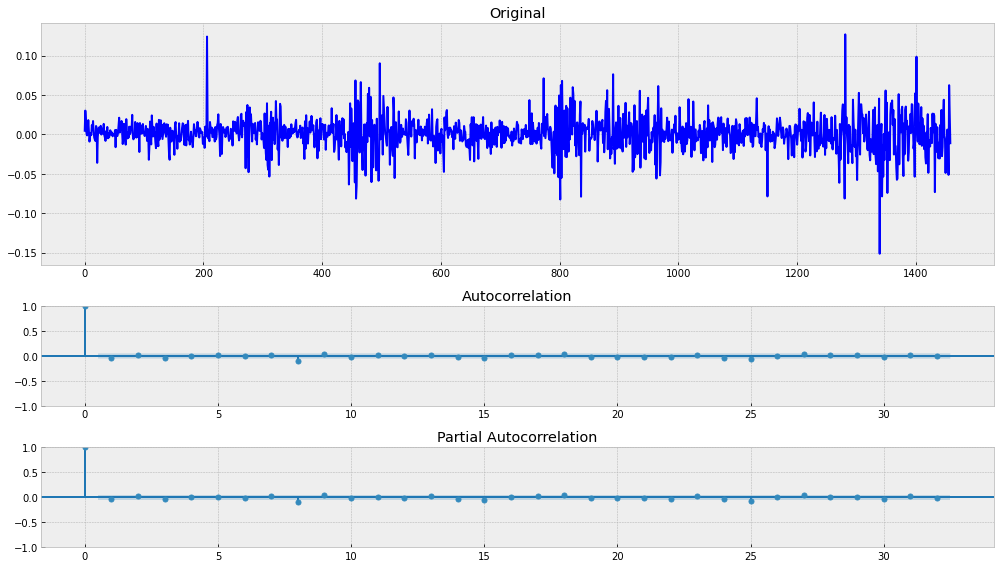

In [32]:
tsplot(series)

In [33]:
Close

NameError: name 'Close' is not defined

In [34]:
series

array([ 0.00464647,  0.03026962,  0.01971596, ...,  0.06246082,
        0.02233419, -0.0111482 ])

In [38]:
# Box-Cox Transformations
df['Close_box'], lmbda = stats.boxcox(df.Close)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df.Close[1])

SyntaxError: unexpected EOF while parsing (294556453.py, line 3)

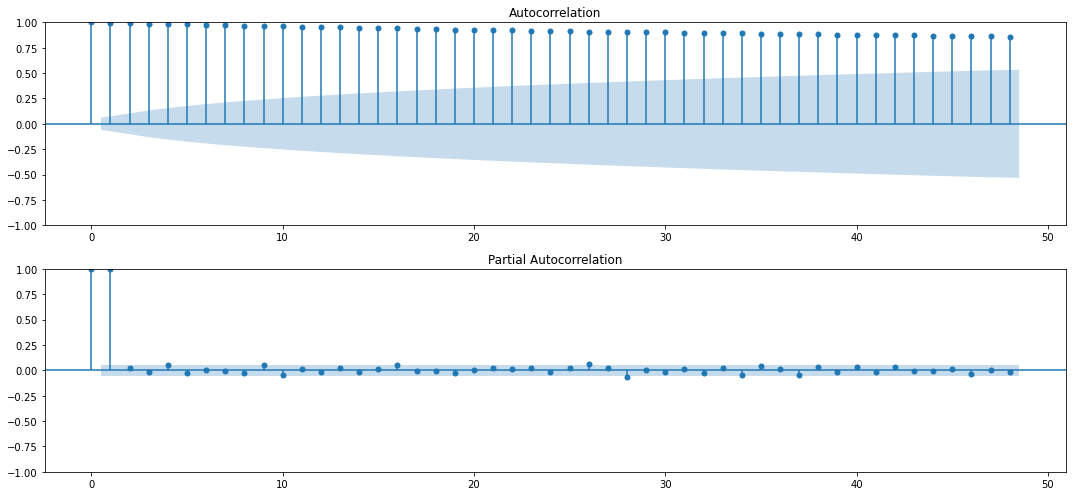

In [39]:


# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df.Close[365:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df.Close[13:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()



In [40]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df.series, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

NameError: name 'product' is not defined

In [41]:


# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())



NameError: name 'results' is not defined

NameError: name 'best_model' is not defined

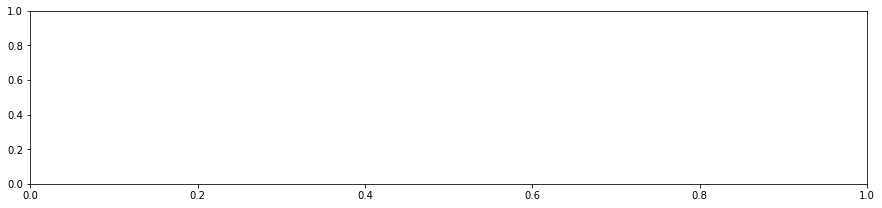

In [42]:


# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()



In [43]:


# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))



In [44]:
# Prediction
df_month2 = df[['Close']]
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
             datetime(2018, 1, 28)]
future = pd.DataFrame(index=date_list, columns= df.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

NameError: name 'datetime' is not defined

In [23]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import warnings
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt
warnings.filterwarnings("ignore")

In [25]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,70422000
2017-01-04,37.919498,37.984001,37.709999,37.859001,50210000
2017-01-05,38.077499,39.119999,38.013000,39.022499,116602000
2017-01-06,39.118000,39.972000,38.924000,39.799500,119724000
2017-01-09,39.900002,40.088501,39.588501,39.846001,68922000
...,...,...,...,...,...
2022-10-13,107.879997,113.440002,105.349998,112.529999,86868100
2022-10-14,114.099998,114.959999,106.599998,106.900002,67651200
2022-10-17,110.110001,114.190002,110.089996,113.790001,62782000


In [26]:
df['1stdiff'] = df['Close'].diff()

In [28]:
df['LogClose'] = np.log(df['Close'])

In [55]:
from statsmodels.tsa.arima.model import ARIMA

#df.index.freq =  'M' # Частотность измерения месяц

Ntest = 30
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [56]:
arima = ARIMA(train['Close'], order=(0,1,0))

In [57]:
arima_result = arima.fit()

In [58]:
df.loc[train_idx, 'AR(1)'] = arima_result.predict(start=train.index[0], end=train.index[-1])

<AxesSubplot:xlabel='Date'>

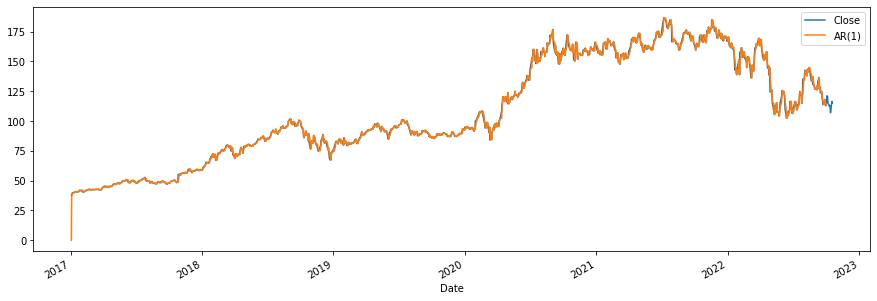

In [59]:
df[['Close', 'AR(1)']].plot(figsize=(15, 5))

In [60]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast

<AxesSubplot:xlabel='Date'>

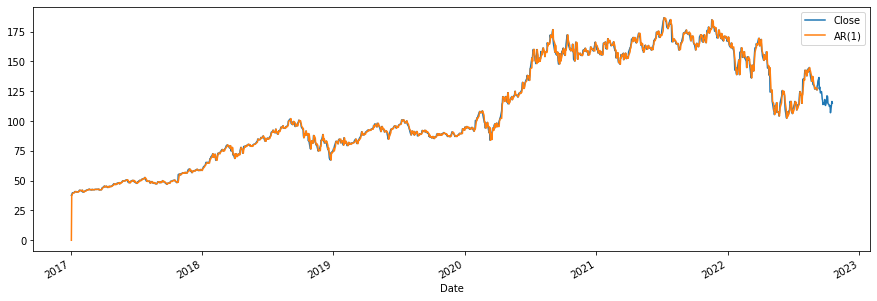

In [61]:
df[['Close', 'AR(1)']].plot(figsize=(15, 5))

In [62]:
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [63]:
# Confidencde Intervals
prediction_result.conf_int()

,lower Close,upper Close
1430,124.642830,134.317162
1431,122.639210,136.320781
1432,121.101779,137.858213
1433,119.805664,139.154327
1434,118.663764,140.296227
1435,117.631408,141.328584
1436,116.682058,142.277934
1437,115.798425,143.161567
1438,114.968498,143.991493
1439,114.183534,144.776457


In [64]:
def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df['Close'], label='data')
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')

    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int['lower Close'], conf_int['upper Close']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
    ax.legend()

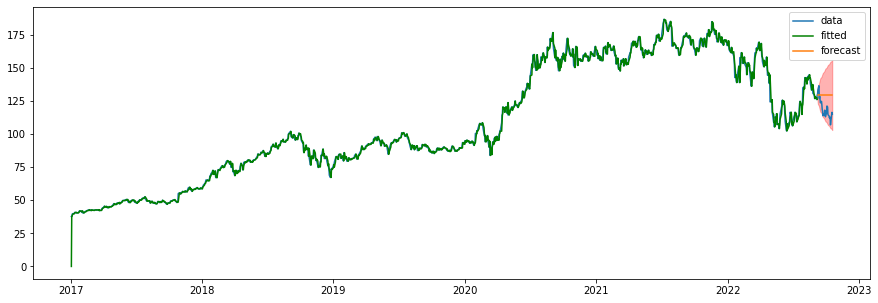

In [65]:
plot_fit_and_forecast(arima_result)

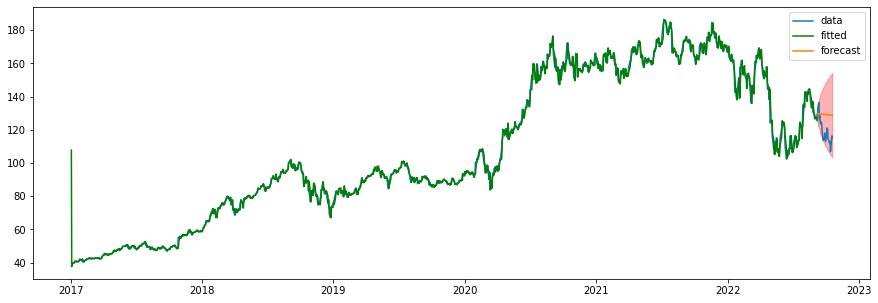

In [66]:
# AR(10)
arima = ARIMA(train['Close'], order=(10,0,0))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [67]:
from itertools import product
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from tqdm import tqdm_notebook


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [68]:
df.head(30)

,Open,High,Low,Close,Volume,AR(1)
Date,,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,70422000,0.000000
2017-01-04,37.919498,37.984001,37.709999,37.859001,50210000,37.683498
2017-01-05,38.077499,39.119999,38.013000,39.022499,116602000,37.859001
2017-01-06,39.118000,39.972000,38.924000,39.799500,119724000,39.022499
2017-01-09,39.900002,40.088501,39.588501,39.846001,68922000,39.799500
2017-01-10,39.830002,39.900002,39.477001,39.794998,51168000,39.846001
2017-01-11,39.682999,39.974998,39.475498,39.951000,59856000,39.794998
2017-01-12,40.015499,40.706501,39.974998,40.681999,97478000,39.951000
2017-01-13,40.716000,41.082500,40.570000,40.856998,75838000,40.681999


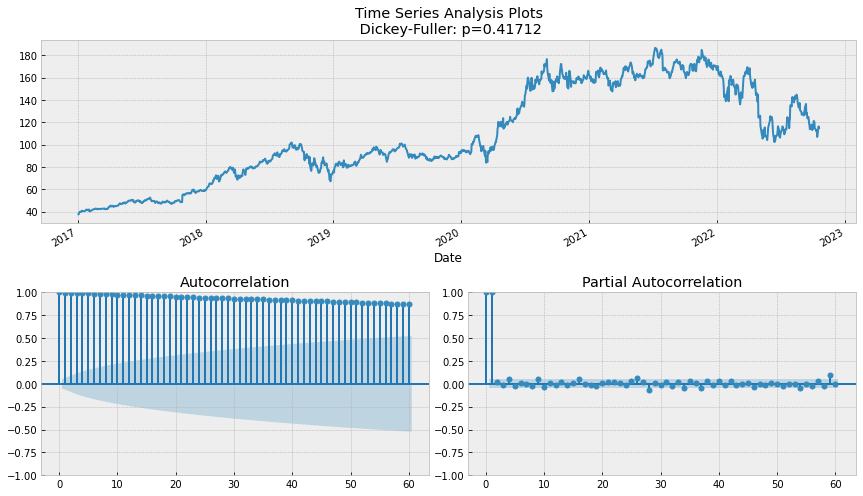

In [69]:
tsplot(df.Close, lags=60)

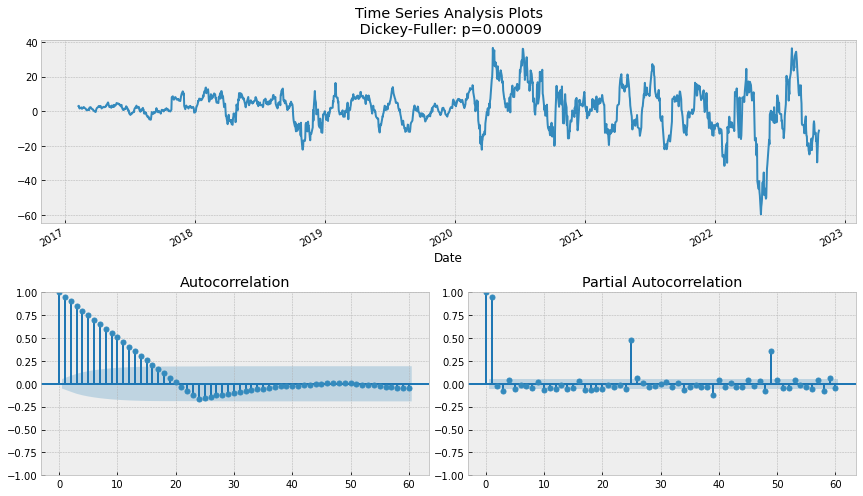

In [70]:
df_diff = df.Close - df.Close.shift(24)
tsplot(df_diff[24:], lags=60)

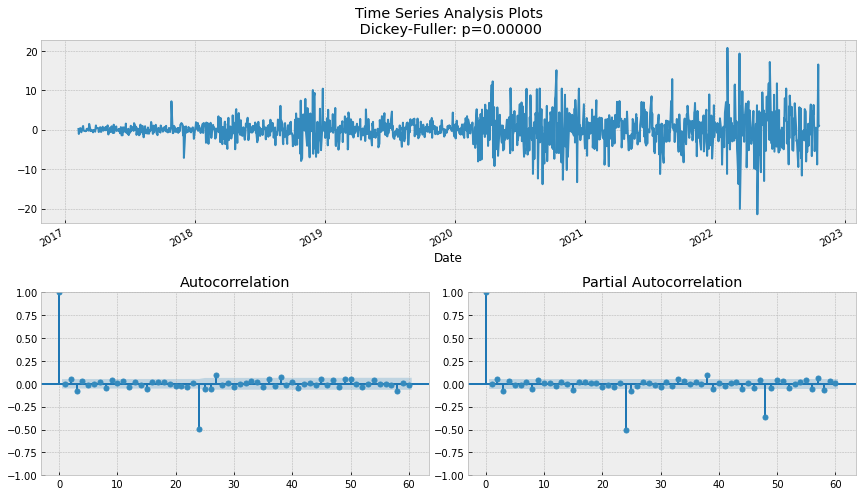

In [71]:
df_diff = df_diff - df_diff.shift(1)
tsplot(df_diff[24+1:], lags=60)

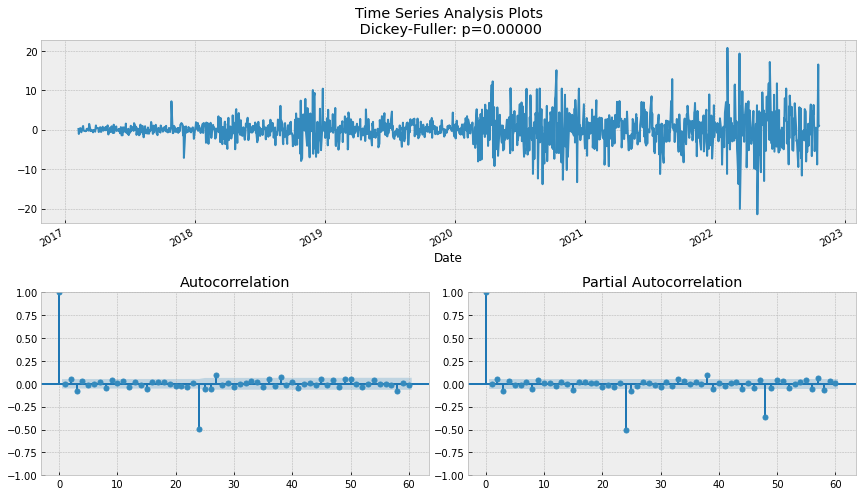

In [72]:
tsplot(df_diff[24+1:], lags=60)

In [73]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1
qs = range(2, 5)
Ps = range(0, 2)
D=1
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [74]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC

        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order
        s - length of season
    """

    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(df.Close, order=(param[0], d, param[1]),
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)

    return result_table

In [75]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)

  0%|          | 0/36 [00:00<?, ?it/s]

CPU times: user 1h 18min 23s, sys: 1min 18s, total: 1h 19min 41s
Wall time: 31min 7s


In [76]:
result_table.head()

,parameters,aic
0,"(2, 2, 0, 1)",6784.991711
1,"(2, 2, 1, 1)",6785.564960
2,"(2, 3, 0, 1)",6786.458210
3,"(3, 2, 0, 1)",6786.469361
4,"(2, 3, 1, 1)",6787.238649


In [77]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(df.Close, order=(p, d, q),
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 1460
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 24)   Log Likelihood               -3386.496
Date:                              Tue, 25 Oct 2022   AIC                           6784.992
Time:                                      23:50:22   BIC                           6816.605
Sample:                                           0   HQIC                          6796.795
                                             - 1460                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6927      0.016   -103.390      0.000      -1.725      -1.661
ar.L2         -0.94

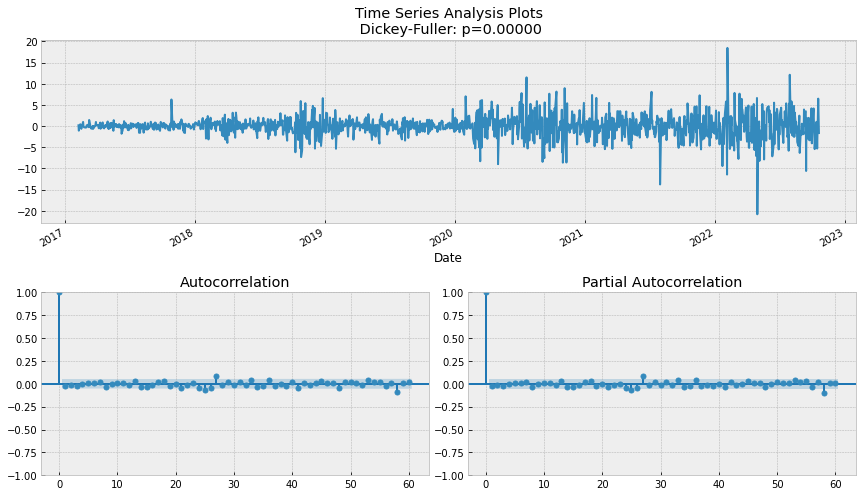

In [78]:
tsplot(best_model.resid[24+1:], lags=60)

In [106]:
# def plotSARIMA(series, model, n_steps, s=24, d=1, plot_intervals=True, alpha=0.2):
#     """
#         Plots model vs predicted values

#         series - dataset with timeseries
#         model - fitted SARIMA model
#         n_steps - number of steps to predict in the future

#     """
#     # adding model values
#     data = series.copy()
#     data.columns = ['actual']
#     data['arima_model'] = model.fittedvalues
#     # making a shift on s+d steps, because these values were unobserved by the model
#     # due to the differentiating
#     data['arima_model'][:s+d] = np.NaN

#     # forecasting on n_steps forward
#     forecast = best_model.get_forecast(steps=365)
#     model_predictions = data.arima_model.append(forecast.predicted_mean)
#     # calculate error, again having shifted on s+d steps from the beginning
#     error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])


#     plt.figure(figsize=(15, 7))
#     plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))

#     plt.plot(model_predictions, color='r', label="model")
#     plt.plot(data.actual, label="actual")

#     if plot_intervals:
#         intervals = forecast.conf_int(alpha=alpha)
#         intervals.columns=['lower', 'upper']
#         plt.plot(intervals['lower'], "r--", alpha=0.5, label = "Up/Low confidence")
#         plt.plot(intervals['upper'], "r--", alpha=0.5)
#         plt.fill_between(x=intervals.index, y1=intervals['upper'],
#                          y2=intervals['lower'], alpha=0.2, color = "grey")


#     plt.legend()
#     plt.grid(True);
    
def plotSARIMA(series, model, n_steps, s=24, d=1, plot_intervals=True, alpha=0.2):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    # forecasting on n_steps forward 
    forecast = best_model.get_forecast(steps=n_steps)
    model_predictions = data.arima_model.append(forecast.predicted_mean)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])
    

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))    
    
    plt.plot(model_predictions, color='r', label="model")
    plt.plot(data.actual, label="actual")
    
    if plot_intervals:
        intervals = forecast.conf_int(alpha=alpha)
        intervals.columns=['lower', 'upper']
        plt.plot(intervals['lower'], "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(intervals['upper'], "r--", alpha=0.5)
        plt.fill_between(x=intervals.index, y1=intervals['upper'], 
                         y2=intervals['lower'], alpha=0.2, color = "grey")    
    
    
    plt.legend()
    plt.grid(True);
 





In [107]:
mask = ['Close']

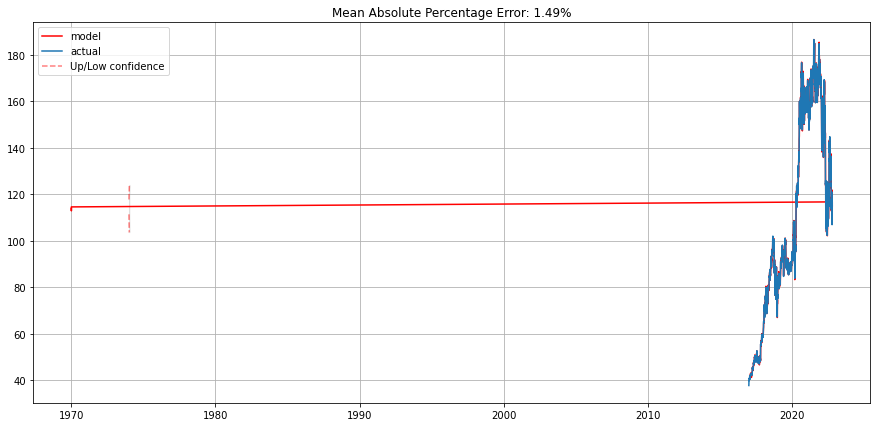

In [108]:
plotSARIMA(df[mask], best_model, 10)